# PCA 實作

## 載入相關套件

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. 載入資料

In [2]:
ds = datasets.load_wine()
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
print(df.shape)

(178, 13)


## 2. 資料清理、資料探索與分析

In [4]:
# 資料集說明
print(ds.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

## 3. 資料分割

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 指定X、Y
X = df.values
y = ds.target

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.2,
                                                    random_state=100
                                                    )

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

## 4. 特徵縮放

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 進行特徵萃取(PCA)

In [7]:
print(X.shape)
print(X.T.shape)
cov_mat = np.cov(X.T)
#print(cov_mat)
pp = pd.DataFrame(cov_mat)
print(pp)

(178, 13)
(13, 178)
            0          1          2           3            4          5   \
0     0.659062   0.085611   0.047115   -0.841093     3.139878   0.146887   
1     0.085611   1.248015   0.050277    1.076332    -0.870780  -0.234338   
2     0.047115   0.050277   0.075265    0.406208     1.122937   0.022146   
3    -0.841093   1.076332   0.406208   11.152686    -3.974760  -0.671149   
4     3.139878  -0.870780   1.122937   -3.974760   203.989335   1.916470   
5     0.146887  -0.234338   0.022146   -0.671149     1.916470   0.391690   
6     0.192033  -0.458630   0.031535   -1.172083     2.793087   0.540470   
7    -0.015754   0.040733   0.006358    0.150422    -0.455563  -0.035045   
8     0.063518  -0.141147   0.001516   -0.377176     1.932832   0.219373   
9     1.028283   0.644838   0.164654    0.145024     6.620521  -0.079998   
10   -0.013313  -0.143326  -0.004682   -0.209118     0.180851   0.062039   
11    0.041698  -0.292447   0.000762   -0.656234     0.669308   0.31

In [8]:
# 計算特徵值(eigenvalue)及對應的特徵向量(eigenvector)
eigen_val, eigen_vecs = np.linalg.eig(cov_mat)
print(eigen_val, eigen_vecs)

[9.92017895e+04 1.72535266e+02 9.43811370e+00 4.99117861e+00
 1.22884523e+00 8.41063869e-01 2.78973523e-01 1.51381266e-01
 1.12096765e-01 8.20370314e-03 2.10723661e-02 3.75759789e-02
 7.17026032e-02] [[-1.65926472e-03 -1.20340617e-03  1.68738094e-02  1.41446778e-01
  -2.03369773e-02  1.94120104e-01 -9.23280337e-01  2.84820658e-01
   8.66006124e-02  8.02924535e-03  1.56514071e-02 -1.49715080e-02
  -2.24499994e-03]
 [ 6.81015556e-04 -2.15498184e-03  1.22003373e-01  1.60389543e-01
   6.12883454e-01  7.42472963e-01  1.50109941e-01 -6.46744678e-02
   1.56621385e-02 -1.10903923e-02 -6.72955455e-02 -2.31876506e-02
  -1.85093501e-02]
 [-1.94905742e-04 -4.59369254e-03  5.19874304e-02 -9.77280992e-03
  -2.01755752e-02  4.17529118e-02 -4.50095493e-02 -1.49339532e-01
   7.36498524e-02 -1.73685673e-01  1.32063034e-01  9.54010643e-01
  -8.67996529e-02]
 [ 4.67130058e-03 -2.64503930e-02  9.38593003e-01 -3.30965260e-01
  -6.43523403e-02 -2.40653026e-02 -3.15265835e-02  1.51539118e-02
   2.04457785e-03

In [9]:
# PCA 函數實作
def PCA_numpy(X, X_test, no):
    #計算共變異數矩陣 
    cov_mat = np.cov(X.T)# X.T @ X => 13*13
    # 計算特徵值(eigenvalue)及對應的特徵向量(eigenvector)
    eigen_val, eigen_vecs = np.linalg.eig(cov_mat)
    # 合併特徵向量及特徵值
    eigen_pairs = [(np.abs(eigen_val[i]), eigen_vecs[:,i]) for i in range(len(eigen_vecs))]

    # 針對特徵值降冪排序
    eigen_pairs.sort(key=lambda x: x[0], reverse=True)#依特徵值由大到小排序

    w = eigen_pairs[0][1][:, np.newaxis]
    for i in range(1, no):
        w = np.hstack((w, eigen_pairs[i][1][:, np.newaxis]))

    # 轉換：矩陣相乘 (n, m) x (m, 2) = (n, 2)
    return X.dot(w), X_test.dot(w)

X_train_pca, X_test_pca = PCA_numpy(X_train_std, X_test_std, 2) # 取 2 個特徵
X_train_pca.shape, X_test_pca.shape

((142, 2), (36, 2))

In [10]:
X_train_std.shape, X_test_std.shape

((142, 13), (36, 13))

In [11]:
print(X_train_std[:5])
print(X_train_pca[:5])

[[-0.61976695  0.10146433 -0.711617    0.4238415  -0.89090409  0.32169706
   0.1560832  -0.79378034 -0.69817729 -1.3928398  -0.31628086  0.14522004
  -1.3544804 ]
 [-1.25168619  1.00027494 -1.31820014 -0.15991692 -0.96972551 -0.57114375
  -0.46505574  0.0874456   0.46692421 -1.72806565 -0.17557947  0.52814549
  -0.61124517]
 [-1.00864033  0.64075069 -0.17639659 -0.15991692 -0.26033272 -1.78865394
  -1.59888078  0.32777994 -1.57648457  0.2367303  -1.44189192 -1.20211028
  -0.77917279]
 [ 0.59546236  0.76658418  1.25085785  1.15353952 -0.1815113  -1.30164986
  -1.56930274  1.12889443 -1.89912806 -0.29869987 -0.36318132 -0.87591452
  -0.74807509]
 [ 1.20307702 -0.57264364 -0.56889156 -1.03555454 -0.26033272  0.48403175
   0.21523929 -0.79378034  0.66409523 -0.13574286  0.3403256   1.29399641
   0.8534569 ]]
[[ 0.54369393  2.03473467]
 [ 0.85645705  2.20139835]
 [ 3.39974237 -0.12512881]
 [ 3.12718286 -0.6585961 ]
 [-2.12129116 -0.0117831 ]]


## 5. 選擇演算法

In [12]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

## 6. 模型訓練

In [13]:
clf.fit(X_train_pca, y_train)

LogisticRegression()

In [14]:
print(clf.score(X_test_pca, y_test))

0.9722222222222222


## 7. 模型計分

In [15]:
# 計算準確率
y_pred = clf.predict(X_test_pca)
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

97.22%


## 繪製決策邊界(Decision regions)

In [16]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    marker=markers[idx], 
                    label=cl)

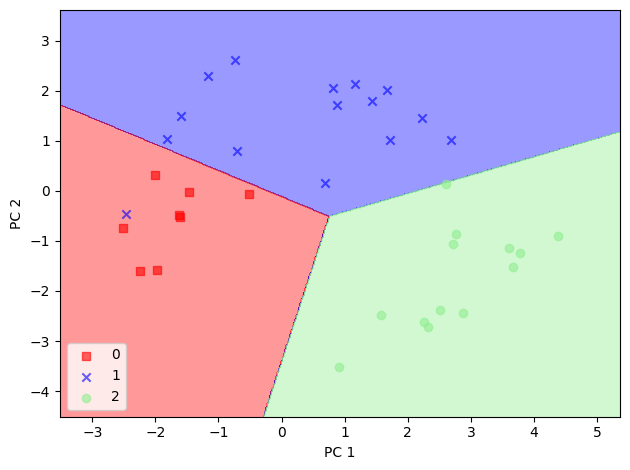

In [17]:
plot_decision_regions(X_test_pca, y_test, classifier=clf)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('decision_regions.png', dpi=300)
plt.show()

## 使用全部特徵

In [18]:
# 載入資料集
X, y = datasets.load_wine(return_X_y=True)

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.2,
                                                    random_state=100)

# 查看陣列維度
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 特徵縮放
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 模型訓練
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_std, y_train)

# 模型計分
y_pred = clf.predict(X_test_std)
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

(142, 13) (36, 13) (142,) (36,)
94.44%
